<a href="https://colab.research.google.com/github/Jonykz/Jonykz/blob/main/Predicting_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Stroke
Goal of the exercise is to predict Stroke (1/0) given other health parameters.

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
#Upload data
df = pd.read_csv('/content/drive/MyDrive/Data Science Datasets/brain_stroke.csv')

In [ ]:
#Convert BMI from a continuous numeric value into categories
df['bmi_category'] = pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,35.9,39.9,100],
                            labels = ['underweight','normal weight','overweight','obese I','obese II','obese III'])

df['age_category'] = pd.cut(df['age'],bins=[0,14,24,64,150],
                            labels = ['child','youth','adult','senior'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese II,senior
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese I,senior
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese I,adult
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal weight,senior
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,overweight,senior


[Text(0.5, 1.0, 'bmi_category Count')]

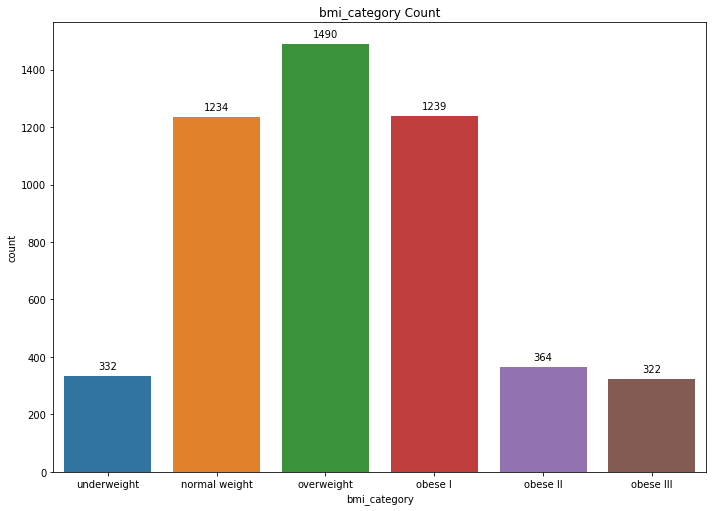

In [ ]:
#Visualize
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
column = 'bmi_category'
splot = sns.countplot(x=df[column])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set(title=f"{column} Count")

In [ ]:
#Remove BMI column, keeping the bmi_category only
df.drop(columns=['bmi','age'], inplace=True)

In [ ]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_category,age_category
0,Male,0,1,Yes,Private,Urban,228.69,formerly smoked,1,obese II,senior
1,Male,0,1,Yes,Private,Rural,105.92,never smoked,1,obese I,senior
2,Female,0,0,Yes,Private,Urban,171.23,smokes,1,obese I,adult
3,Female,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,normal weight,senior
4,Male,0,0,Yes,Private,Urban,186.21,formerly smoked,1,overweight,senior


In [ ]:
#Check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4981 non-null   object  
 1   hypertension       4981 non-null   int64   
 2   heart_disease      4981 non-null   int64   
 3   ever_married       4981 non-null   object  
 4   work_type          4981 non-null   object  
 5   Residence_type     4981 non-null   object  
 6   avg_glucose_level  4981 non-null   float64 
 7   smoking_status     4981 non-null   object  
 8   stroke             4981 non-null   int64   
 9   bmi_category       4981 non-null   category
 10  age_category       4981 non-null   category
dtypes: category(2), float64(1), int64(3), object(5)
memory usage: 360.5+ KB


gender               0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
bmi_category         0
age_category         0
dtype: int64

In [ ]:
#Set Target
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [ ]:
#Convert categorical variables into 1/0
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status','bmi_category','age_category']
X = pd.get_dummies(X[columns])


0    4733
1     248
Name: stroke, dtype: int64


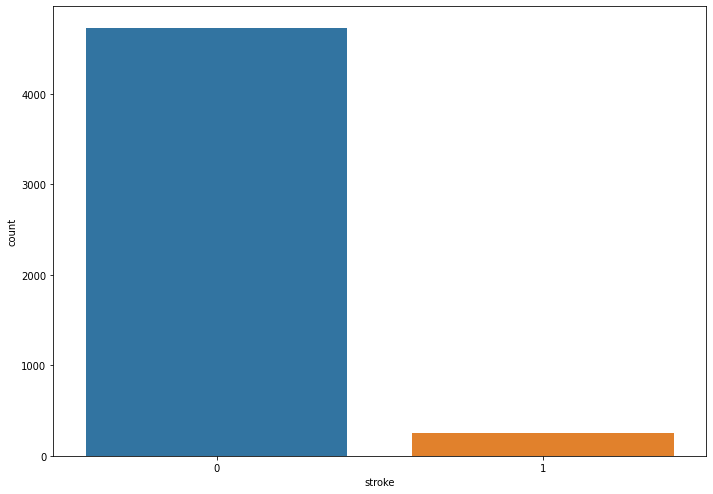

In [ ]:
#Check if the dataset is balanced. Goal is to have eqaul 1 & 0 for target
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [ ]:
#Dataset is imblanced. Use SMOTE technique to balance the dataset.

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    4733
0    4733
Name: stroke, dtype: int64


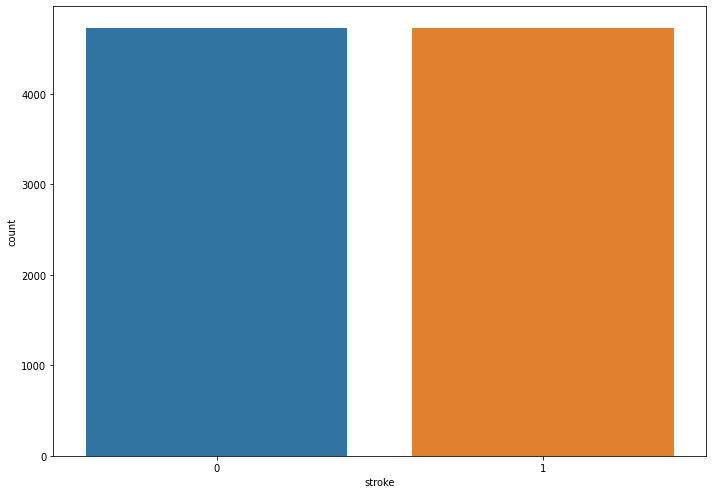

In [ ]:
#Check For the balance again
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())